#Author: Saksham Madan
###Prediction using Decision tree
Dataset: iris dataset

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Creating train and test dataset

In [5]:
#75% of the data into a training set and 25% of the data into a test set
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

###Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)

# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


As accuracy is only 89.47, we will try to improve this.

####Finding the optimal max depth

In [11]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)


Plot Accuracy vs max_depth <br>
NOTE: max_depth is not always equal to the depth of the tree

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

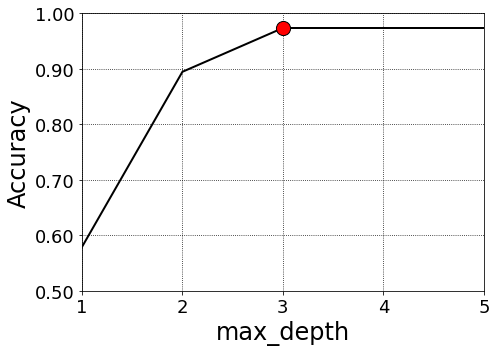

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5));
marker_style = dict(color='tab:blue', linestyle=':', marker='o',markersize=15, markerfacecoloralt='tab:red')

ax.plot(max_depth_range,accuracy,lw=2,color='k',zorder = 0)
s = ax.scatter(max_depth_range[2],accuracy[2],color = 'r',s = 200,alpha = 1,zorder = 10,marker = 'o',)
s.set_edgecolor( 'black' )
ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,axis = 'both',zorder = 1,linestyle = ':',color = 'k')
yticks = ax.get_yticks()
y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()

As we note from above plot that, max_depth of 3 is the suitable solution for best possible accuracy.

In [21]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)

print(score)

0.9736842105263158


We have achieved 97.36% accuracy.

####Visualizing Decision Tree

In [22]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


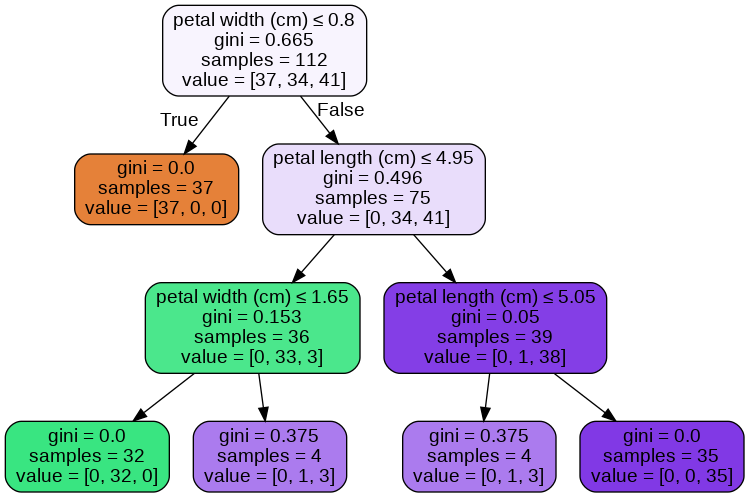

In [26]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=data.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())